### Importing the required libraries

In [1174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("dark")
sns.set_style("white")
plt.rcParams["figure.figsize"] = [10, 8]

### Reading data from the CSV file

In [1175]:
emission_table = pd.read_csv("greenhouse_gas_inventory_data_data.csv")

In [1176]:
emission_table.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent


As we can see, the category data colum is having a large width that may bot be fit in pandas dataframe, hence using the colwidth for the better visibility of data across the category column.

In [1177]:
pd.set_option('display.max_colwidth', -1)

In [1178]:
by_category  = emission_table.groupby(['category'])

In [1179]:
category_count = by_category.count()

In [1180]:
category_count

,country_or_area,year,value
category,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,949,949,949
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,975,975,975
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,248,248,248
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,831,831,831
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,1032,1032,1032


As we know we need to slice the category names in many parts to get the exact name of the Green House Gas. Here we can see a common thing in every category name =, i.e. *"_in_kilotonne_co2_equivalent"* at the end of every category. So my workflow for next few hours will comprise of the following things.

  * Slicing the common part from each category name and updating that with a copy of the main dataframe.
  * Slicing GHG and the other required hyperparameters like - indirect co2 or land usage forestry etc. 

### Breaking the problem in smaller part and preparing a small algo

In [1181]:
strp = category_count.index

In [1182]:
io = strp[0]
io[108]

't'

In [1183]:
io

'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'

In [1184]:
hdd = len(io)
hdd

109

In [1185]:
io.find("_in_kilotonne_co2_equivalent",0,hdd)

81

In [1186]:
# Here we get success
io[:81]

'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf'

**Conclusion for the Algorithm is to run a for loop and update each category type one by onne, then update the main category dataframe.**

### Algorithm Begins

In [1187]:
new_category_index = []
for string in strp:
    p = len(string)
    pos = string.find("_in_kilotonne_co2_equivalent",0,p)
    string = string[:pos]
    new_category_index.append(string)

In [1188]:
new_category_index

['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf',
 'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'hydrofluorocarbons_hfcs_emissions',
 'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'nitrogen_trifluoride_nf3_emissions',
 'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'perfluorocarbons_pfcs_emissions',
 'sulphur_hexafluoride_sf6_emissions',
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions']

In [1189]:
new_category_index_reborn = []
for lingo in new_category_index:
    q = len(lingo)
    pos = lingo.find("_without",0,p)
    lingo = lingo[:pos]
    new_category_index_reborn.append(lingo)

In [1190]:
new_category_index_reborn

['carbon_dioxide_co2_emissions',
 'greenhouse_gas_ghgs_emissions_including_indirect_co2',
 'greenhouse_gas_ghgs_emissions',
 'hydrofluorocarbons_hfcs_emission',
 'methane_ch4_emissions',
 'nitrogen_trifluoride_nf3_emission',
 'nitrous_oxide_n2o_emissions',
 'perfluorocarbons_pfcs_emission',
 'sulphur_hexafluoride_sf6_emission',
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emission']

In [1191]:
short_category = ["co2","ghg(indirect co2)","ghg","hfc","ch4","nf3","n2o","pfc","sf6","hfc+pfc"]

In [1192]:
category_count["Shorted_category"] = short_category

In [1193]:
category_count

,country_or_area,year,value,Shorted_category
category,,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,co2
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,949,949,949,ghg(indirect co2)
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,ghg
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,975,975,975,hfc
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,ch4
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,248,248,248,nf3
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,n2o
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,831,831,831,pfc
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,1032,1032,1032,sf6


### Cleaning the data for better comprehension

Replacing the category colum by the following:-
* carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent	= **CO2**
* greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent = **GHG(Indirect CO2)**
* greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **GHG**
* hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent = **HFC**
* methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **CH4**
* nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent = **NF3**
* nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **N2O**
* perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent = **PFC**
* sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent = **SF6**
* unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent = **HFC+PFC**

In [1194]:
trying_emission = emission_table

In [1195]:
replaced_emission = trying_emission.replace(to_replace=["carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_"
                                     "forestry_lulucf_in_kilotonne_co2_equivalent","greenhouse_gas_ghgs_emissions_including_indirect_co2"
                                    "_without_lulucf_in_kilotonne_co2_equivalent","greenhouse_gas_ghgs_emissions_without_land_use_land_use"
                                    "_change_and_forestry_lulucf_in_kilotonne_co2_equivalent","hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent",
                                    "methane_ch4_emissions_without_land_use_land_use_change"
                                    "_and_forestry_lulucf_in_kilotonne_co2_equivalent","nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent",
                                    "nitrous_oxide_n2o_emissions_without_land_use_land_use_change" 
                                    "_and_forestry_lulucf_in_kilotonne_co2_equivalent","perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent",
                                    "sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent",
                                    "unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons"
                                    "_pfcs_emissions_in_kilotonne_co2_equivalent"], value = ["CO2","GHG(Indirect CO2)","GHG","HFC","CH4","NF3","N2O","PFC","SF6","HFC+PFC"])


In [1196]:
# replacing and changing the data and it's index for better EDA(Exploratory Data Analysis)
l = replaced_emission.groupby(["category"],as_index=False)

In [1197]:
l.count()

,category,country_or_area,year,value
0,CH4,1074,1074,1074
1,CO2,1074,1074,1074
2,GHG,1074,1074,1074
3,GHG(Indirect CO2),949,949,949
4,HFC,975,975,975
5,HFC+PFC,75,75,75
6,N2O,1074,1074,1074
7,NF3,248,248,248
8,PFC,831,831,831
9,SF6,1032,1032,1032


### Exploratory Data Analysis

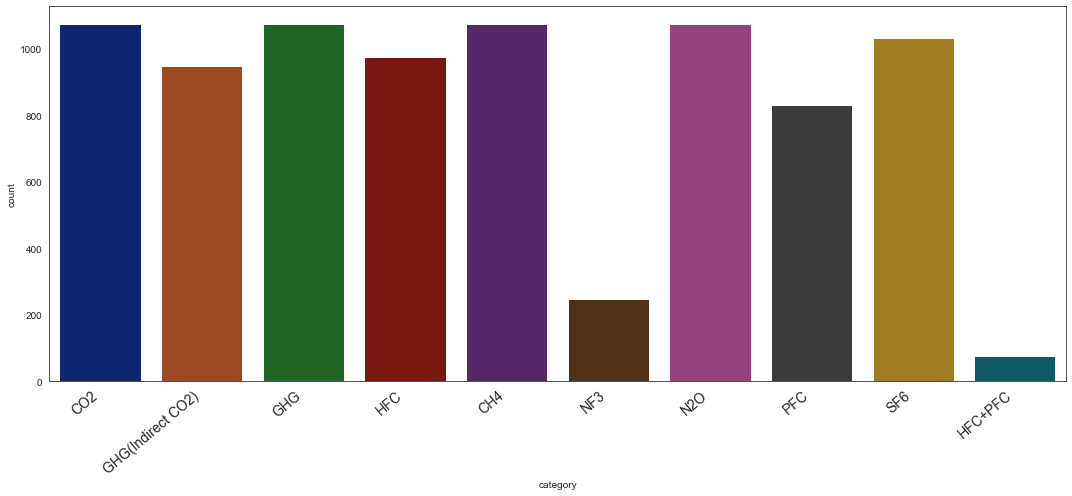

In [1198]:
plt.figure(figsize=(15,7))
ax = sns.countplot(replaced_emission["category"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right", fontsize=14)
plt.tight_layout()
plt.show()

**Conclusion -1**:
    The data iteself is very irregular interms of distribution and labels. *GHG(Indirect CO2)* is a part of CO2 data. Hence *CO2* is the most occuring Green House Gas. Also the *HFC*,*PFC* anf *HFC+PFC* data can be overlapped, but the exact proportion is unknown. *NF3* turns out to be occured the least. Also *GHG* has a undefined label, we can't say exactly how much proportion of other gases are present or some of them are not present while labeling the data.

### Calculating the Total amount of gases emitted 

In [1199]:
loct = replaced_emission.groupby(['category'])['value'].sum()

In [1200]:
replaced_emission['Total Emitted Gas'] = replaced_emission['value'].groupby(replaced_emission['category']).transform('sum')

In [1201]:
loct.values

array([7.87271139e+07, 4.64020441e+08, 5.85188513e+08, 5.57452664e+08,
       7.27289194e+06, 2.44839942e+05, 3.21367507e+07, 2.81398722e+04,
       1.51517345e+06, 1.24316251e+06])

In [1202]:
new_dataframe_emission = pd.DataFrame(loct.index)

In [1203]:
new_dataframe_emission["Total Amount Emitted(In Kilotones)"] = loct.values

### Sorting the dataframe to know the amount

In [1204]:
new_dataframe_emission.sort_values(by=['Total Amount Emitted(In Kilotones)'], inplace=True,ascending=False)

In [1205]:
new_dataframe_emission

,category,Total Amount Emitted(In Kilotones)
2,GHG,5.851885e+08
3,GHG(Indirect CO2),5.574527e+08
1,CO2,4.640204e+08
0,CH4,7.872711e+07
6,N2O,3.213675e+07
4,HFC,7.272892e+06
8,PFC,1.515173e+06
9,SF6,1.243163e+06
5,HFC+PFC,2.448399e+05
7,NF3,2.813987e+04


**Conclusion - 2:**
    Yet another problem, *GHG* category has the maximum emitted amount, *CO2* and *indirect CO2*, sums up to make *CO2* maximum. *NF3* has the least emitted amount. 

*Lets try another approach*

In [1206]:
replaced_emission.head()

,country_or_area,year,value,category,Total Emitted Gas
0,Australia,2014,393126.946994,CO2,4.640204e+08
1,Australia,2013,396913.936530,CO2,4.640204e+08
2,Australia,2012,406462.847704,CO2,4.640204e+08
3,Australia,2011,403705.528314,CO2,4.640204e+08
4,Australia,2010,406200.993184,CO2,4.640204e+08


In [1207]:
Australia_data = replaced_emission[replaced_emission["country_or_area"]=="Australia"].groupby(["category","year"],as_index = False)

In [1208]:
data_div = pd.pivot_table(replaced_emission,values="value",index = ["country_or_area", "year"],columns = ["category"])

In [1209]:
data_div

category                                 CH4           CO2           GHG  \
country_or_area          year                                              
Australia                1990  118768.837813  2.782659e+05  4.186230e+05   
                         1991  117744.641814  2.797416e+05  4.186741e+05   
                         1992  116837.506726  2.847661e+05  4.230801e+05   
                         1993  113837.511923  2.891423e+05  4.237649e+05   
                         1994  110997.410185  2.938307e+05  4.240930e+05   
                         1995  109900.735111  3.051625e+05  4.334787e+05   
                         1996  109185.337720  3.119148e+05  4.398040e+05   
                         1997  111898.854749  3.204391e+05  4.517217e+05   
                         1998  111427.929806  3.343281e+05  4.663821e+05   
                         1999  107889.224971  3.437139e+05  4.722460e+05   
                         2000  111520.309552  3.498854e+05  4.834458e+05   
                         2001  110301.733954  3.576533e+05  4.914417e+05   
                         2002  108309.143528  3.618614e+05  4.947401e+05   
                         2003  102574.207810  3.683460e+05  4.951541e+05   
                         2004  103839.210857  3.815193e+05  5.117102e+05   
                         2005  105887.562989  3.855811e+05  5.188508e+05   
                         2006  104842.389866  3.911341e+05  5.225172e+05   
                         2007  105174.667802  3.988165e+05  5.298429e+05   
                         2008  103119.546054  4.042378e+05  5.336935e+05   
                         2009  101886.833298  4.084485e+05  5.378899e+05   
                         2010  99447.730159   4.062010e+05  5.339174e+05   
                         2011  101085.537857  4.037055e+05  5.340898e+05   
                         2012  100796.838744  4.064628e+05  5.373776e+05   
                         2013  99857.204626   3.969139e+05  5.268827e+05   
                         2014  98076.109401   3.931269e+05  5.223971e+05   
Austria                  1990  10598.566361   6.229717e+04  7.884463e+04   
                         1991  10462.096189   6.590351e+04  8.263690e+04   
                         1992  10164.748677   6.043225e+04  7.593100e+04   
                         1993  10073.833199   6.079076e+04  7.598823e+04   
                         1994  9775.857792    6.118910e+04  7.650349e+04   
...                                     ...            ...           ...   
United Kingdom           2010  66694.938908   5.075957e+05  6.141667e+05   
                         2011  63739.891235   4.648857e+05  5.659890e+05   
                         2012  60961.914039   4.843881e+05  5.829466e+05   
                         2013  56195.511864   4.758321e+05  5.700785e+05   
                         2014  53890.864763   4.347946e+05  5.275008e+05   
United States of America 1990  773854.896420  5.115095e+06  6.397144e+06   
                         1991  777034.220915  5.064880e+06  6.330938e+06   
                         1992  776869.789752  5.170274e+06  6.448677e+06   
                         1993  764089.671267  5.284759e+06  6.566416e+06   
                         1994  770450.426146  5.377492e+06  6.650297e+06   
                         1995  767943.405720  5.441599e+06  6.748529e+06   
                         1996  762203.846175  5.630114e+06  6.949838e+06   
                         1997  747177.110143  5.704997e+06  6.999999e+06   
                         1998  737821.420620  5.744672e+06  7.066788e+06   
                         1999  723454.873640  5.818972e+06  7.090443e+06   
                         2000  717473.935246  5.992438e+06  7.258973e+06   
                         2001  712676.764974  5.894463e+06  7.140899e+06   
                         2002  706330.241905  5.935739e+06  7.185328e+06   
                         2003  708554.517044  5.982289e+06  7.224974e+06   
                         2004  704886.776627  6.

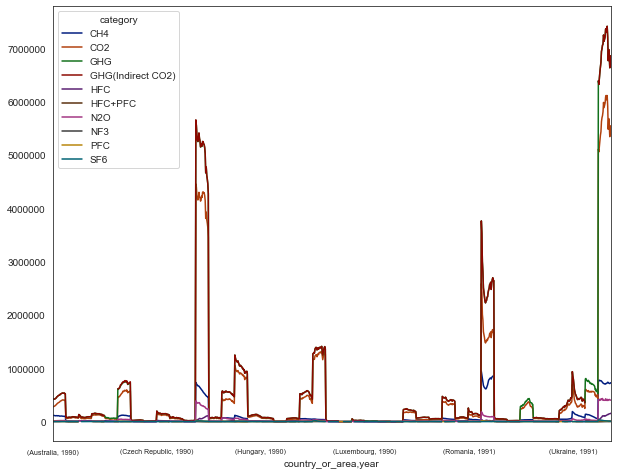

In [1210]:
data_div.plot()

This doesn't depict the correct info and looks like a mess

### Plotting Country Wise

In [1211]:
replaced_emission["country_or_area"].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [1212]:
gases = data_div.columns.values

In [1213]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

In [1214]:
# lets define a function that can plot the country data 
def plot_the_country(name):
    find = data_div.loc[name]
    plt.plot(find)
    plt.legend(gases)
    plt.tick_params(labelsize=12)
    plt.xlim(2000,2014)

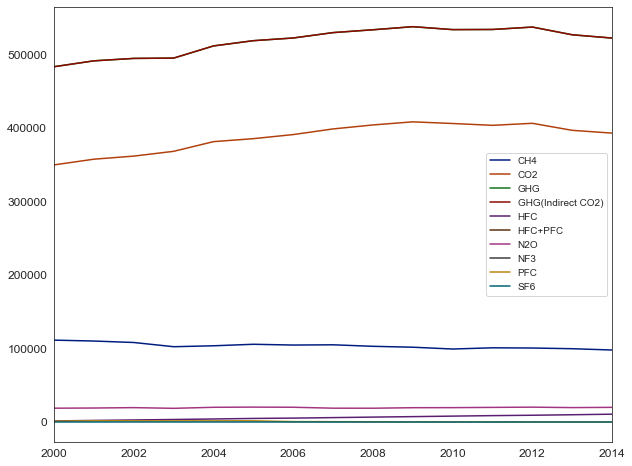

In [1215]:
plot_the_country("Australia")

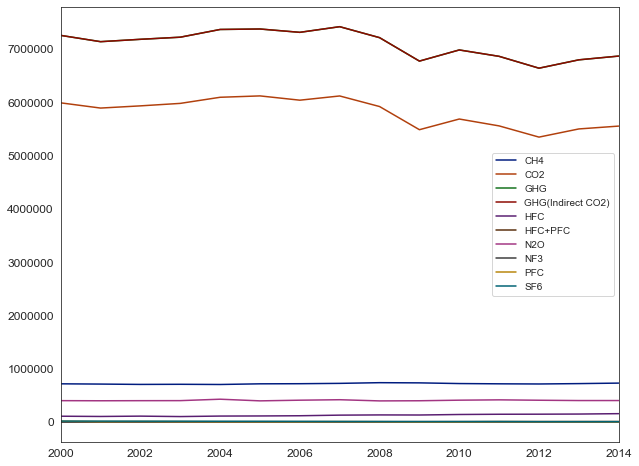

In [1216]:
plot_the_country("United States of America")

During Recession from Dec,2007-June,2009, **United States Of America** had a deep decline in emission of CO2. There may be many reasons, one being the decrease in purchasing power of automobile in USA or fall in Industrial development and production.

**Note:-** It requires more research later.

May be **United States of America** has changed it's way of business and industrial laws after the Recession in 2009, that's why the emission value of CO2(direct and indirect) has increased till 2010.

On the other hand, **Australia** had no such effects.It had almost uniform increase in the amount of CO2 emission during recession.

Lets see few more countries

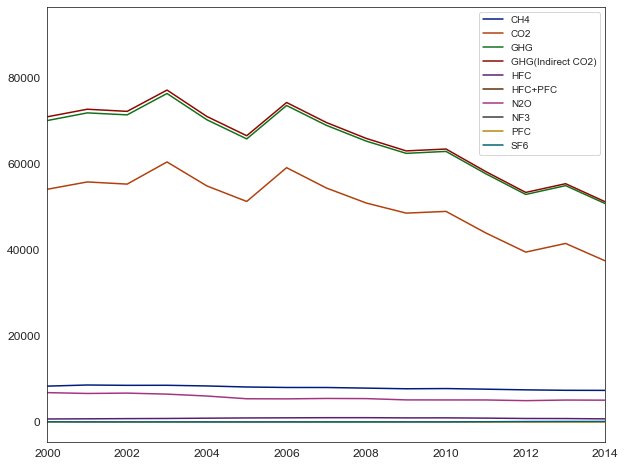

In [1217]:
plot_the_country("Denmark")

May be after recession, **Denmark** had new laws on pollution control. There is a strong negative inclination.

Lets look at East-Asian countries

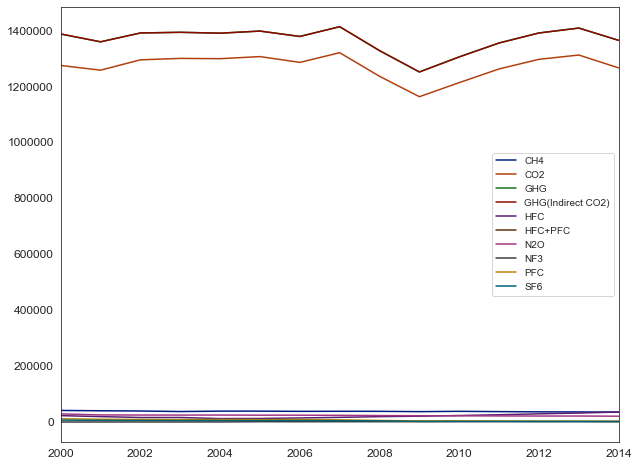

In [1218]:
plot_the_country("Japan")

**Japan** had a decrease in CO2 emission during recession, may be they were affected the most or any new law arrived which reduced the purchasing power of their countymen. It requires more research.

**Conclusion-3** - We need to compare the emission data country wise instead of gas types,that can give us a better research output.

### Comparing Emission Data Country Wise

In [1219]:
area_div = pd.pivot_table(replaced_emission, values='value', index=['category', 'year'], columns=['country_or_area'])
area_div.head(20)

country_or_area      Australia       Austria       Belarus       Belgium  \
category year                                                              
CH4      1990    118768.837813  10598.566361  17944.369142  12040.181048   
         1991    117744.641814  10462.096189  17258.134452  11999.377566   
         1992    116837.506726  10164.748677  16295.436192  11886.349715   
         1993    113837.511923  10073.833199  15583.113398  11838.303374   
         1994    110997.410185  9775.857792   14331.807083  11867.016600   
         1995    109900.735111  9674.049590   13611.075970  11947.638179   
         1996    109185.337720  9382.925634   13672.822022  11802.081834   
         1997    111898.854749  9011.517063   13578.265278  11689.898943   
         1998    111427.929806  8831.331453   13540.244709  11524.999684   
         1999    107889.224971  8645.176255   13212.462486  11265.277850   
         2000    111520.309552  8466.366071   12922.696280  10827.004563   
         2001    110301.733954  8284.300539   12799.025856  10386.252961   
         2002    108309.143528  8134.080336   12705.355450  9956.500859    
         2003    102574.207810  8061.205812   13734.631920  9372.468380    
         2004    103839.210857  8048.712308   14331.370196  9318.580720    
         2005    105887.562989  7809.615176   14727.060054  9074.769078    
         2006    104842.389866  7667.628872   15450.078576  8982.981926    
         2007    105174.667802  7543.052546   15646.793247  8947.755210    
         2008    103119.546054  7399.361705   16240.159788  8736.794244    
         2009    101886.833298  7294.264546   17118.031159  8668.573668    

country_or_area      Bulgaria         Canada      Croatia      Cyprus  \
category year                                                           
CH4      1990    16430.837565  95378.251942   3770.717761  693.566622   
         1991    15313.268855  97516.511686   3625.915742  704.355986   
         1992    14869.295993  101927.841563  3227.336089  733.570274   
         1993    13764.491319  105204.361167  3260.041563  761.678069   
         1994    12003.087341  108917.321071  3034.348436  773.175583   
         1995    12051.210562  113111.078283  2986.637175  797.533507   
         1996    11936.166516  116885.460266  2968.513006  819.083378   
         1997    11500.645277  118988.193048  2908.314030  826.651707   
         1998    10886.058568  120647.458345  2866.646554  830.270404   
         1999    10347.035078  120592.533777  2847.590855  831.090819   
         2000    10189.340058  120724.871831  2785.338223  847.453418   
         2001    9491.668896   119920.258788  2844.147841  887.602343   
         2002    9374.212548   117504.637071  2838.302617  921.251494   
         2003    10063.720369  116809.277477  2936.870511  917.705867   
         2004    9476.237783   117419.386087  3061.844195  914.712171   
         2005    8720.075935   116434.331258  3029.461752  894.249977   
         2006    8446.725322   115516.052739  3100.590412  894.042452   
         2007    8389.983299   113213.994031  3114.802057  915.518721   
         2008    8164.025188   110540.258265  3153.402762  919.096320   
         2009    7794.838368   106149.435213  3214.901483  921.274584   

country_or_area  Czech Republic      Denmark  ...  Russian Federation  \
category year                                 ...                       
CH4      1990    23315.046769    8082.707613  ...  942383.462118        
         1991    21607.175422    8279.662247  ...  875196.162997        
         1992    20139.159952    8364.646101  ...  794953.160990        
         1993    19226.589930    8570.915282  ...  737770.858519        
         1994    18086.829077    8437.693903  ...  680641.143638        
         1995    17744.942585    8497.613284  ...  655448.422294        
         1996    17564.912099    8608.320974  ...  637618.056003        
         1997    17105.079739    8506.801961  ...  627871.88965

In [1220]:
countries = area_div.columns.values

In [1244]:
def country_wise_plot(name):
    cname = area_div.loc[name]
    plt.plot(cname)
    plt.tick_params(labelsize=14)
    plt.legend(countries, loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 18,ncol = 3)

In [1245]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

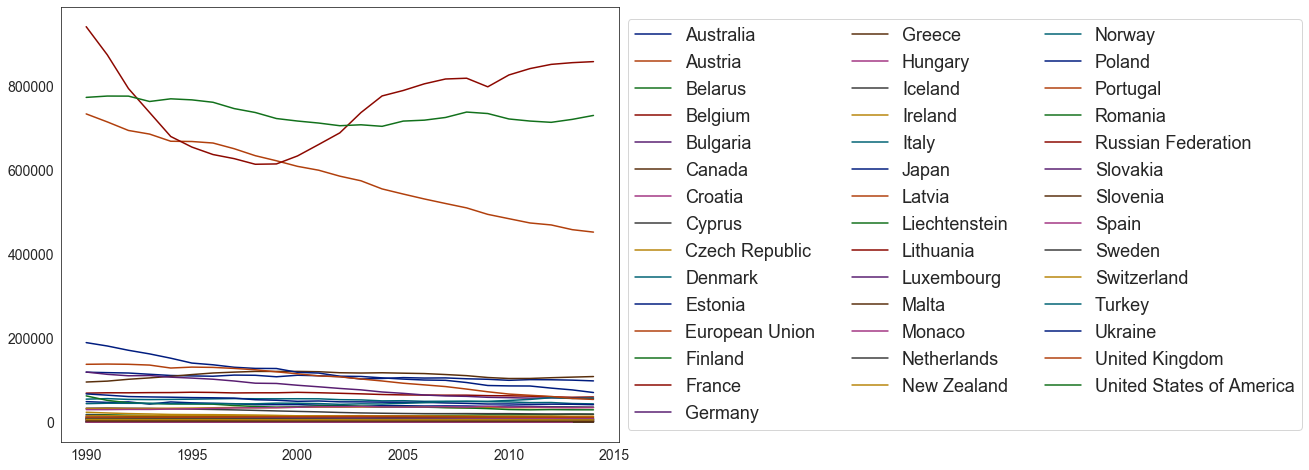

In [1246]:
country_wise_plot(gases[0])

Above plot is OK for rough estimation but not good for a better grasp, hence let's design something that can plot the selected countries on the same graph with the same context.

### Comparing Countries By Passing Required Series

In [1235]:
def gas_accord_country1(gas_name, country_name):                          # years from 1990-2004
    data = area_div.loc[gas_name]
    data.plot( y = country_name)
    plt.legend(country_name,loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 18,ncol = 2)
    plt.tick_params(labelsize=14)
    plt.xlabel("Year",fontsize=14)
    plt.xlim(1990,2004)
    
def gas_accord_country2(gas_name, country_name):
    data = area_div.loc[gas_name]
    data.plot( y = country_name)
    plt.legend(country_name,loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 18,ncol = 2)
    plt.tick_params(labelsize=14)
    plt.xlabel("Year",fontsize=14)
    plt.xlim(2004,2017)

In [1236]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

In [1237]:
countries_name = replaced_emission["country_or_area"].unique()

In [1238]:
countries_name

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

## Analysing the data WRT gas name and country

### <u> For Methane(CH4) emission:</u>

#### 1. <u>  Country Set - 1 :</u>
**Australia, Austria, Belarus, Belgium, Bulgaria, Canada,Croatia,Cyprus**

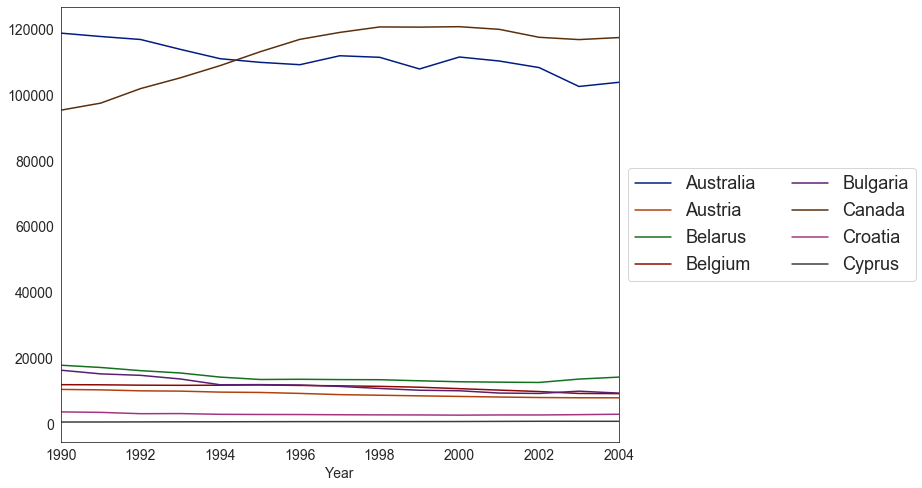

In [1239]:
gas_accord_country1(gases[0],countries_name[:8]).

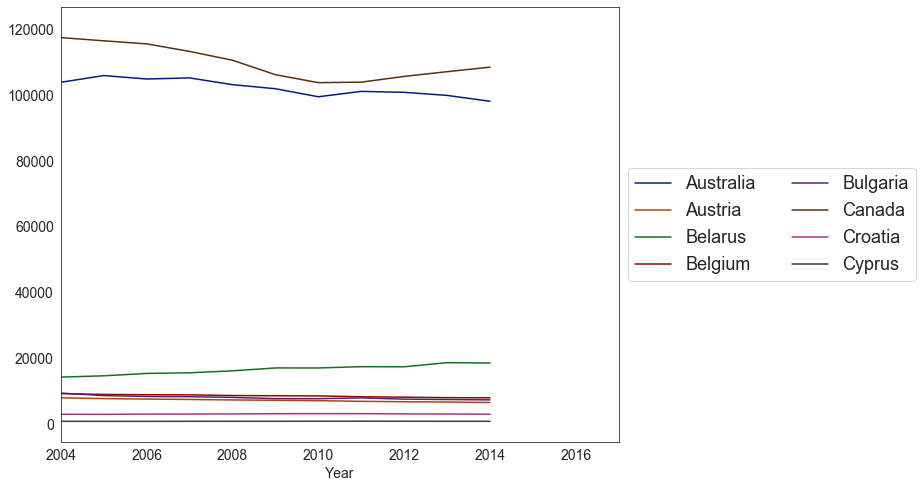

In [1240]:
gas_accord_country2(gases[0],countries_name[:8])